# Samples and Kernels

## Descriptive Statistics
- Recall the following:

| | Sample Estimates <font color="white">(notations)</font> | Probabilisty Density Functions   |
|--|--------------|-------------|
| **Average** | $\displaystyle\ \bar{x}=\frac{1}{N}\sum_{i=1}^N x_i = \big\langle x_i \big\rangle_{i=1}^N$ | $\displaystyle\ \mu = \mathbb{E}[X] =\!\int\!x\,p(x)\,dx$| 
| **Variance** | $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $|  $\displaystyle\ \mathbb{Var}[X] =\!\int\!(x\!-\!\mu)^2 p(x)\,dx$| 

## Sampling from distributions
- Uniform between $a$ and $b$: scale and shift: $\displaystyle U_{ab} = a + (b\!-\!a)\,U_{01} $
- Inverse transform sampling in $\mathbb{R}$: $\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $
- Rejection sampling - also works in $\mathbb{R}^N$

## Numerical Methods
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$, the following will be true:
- mean: $\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $
    - Or a function of $x$: $\displaystyle\mathbb{E}[f(X)] =\!\int f(x)\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i f(x_i) $
- Variance: $\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$
    - compare to $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $
- Bessel correction: $N\!-\!1$ independent $(x_i\!-\!\bar{x})$ differences

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# generate N samples
mu, sigma, N = 0, 1, 5

# pick a distribution
gauss = norm(mu, sigma)

# get random variates
x = gauss.rvs(N)

mean = x.mean()
print (f'Mean: {mean}')

# variance estimates
s2   = np.sum( (x-mean)**2 ) /(N-1)  # corrected
s2n  = np.sum( (x-mean)**2 ) / N     # biased 
s2k  = np.sum( (x- mu)**2 ) / N     # known mean

print (f'''Variance: 
    {s2:.4f} Bessel-corrected 
    {s2n:.4f} biased 
    {s2k:.4f} known mean
    ''') 

Mean: -0.6745904682143169
Variance: 
    0.5703 Bessel-corrected 
    0.4562 biased 
    0.9113 known mean
    


shape of DF (n points/m recursions): (5, 100000) number of means: (100000,)
shape of variance estimates: (100000,)
1.000406892926331 0.8003255143410647 0.9985889149641379


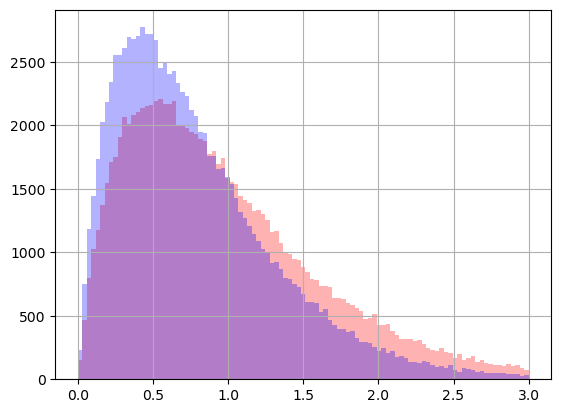

In [5]:
# generate M runs with N samples each
N, M = 5, 100000
X = gauss.rvs((N,M))
avg = X.mean(axis=0)
print ('shape of DF (n points/m recursions):', X.shape, 'number of means:', avg.shape)

# variance estimates - check out broadcasting in X-avg
s2   = np.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np.sum( (X- mu)**2, axis=0) / N    # known mean

print ('shape of variance estimates:', s2.shape)

# averages
print (s2.mean(), s2n.mean(), s2k.mean())

plt.hist(s2 , 101, range=[0,3], color='r', alpha=0.3);
plt.hist(s2n, 101, range=[0,3], color='b', alpha=0.3);
plt.grid()

## Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$
    - $\displaystyle \mathrm{Hist}(x) = \frac{1}{Nh}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
    - $\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
    - Can use different $K(\cdot)$ kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov

### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels
